In [6]:
%load_ext autoreload
%autoreload 2
import sys

In [7]:
sys.path.append('/home/iaamini/Documents/ML_practice/ML_fundamentals/ML_fundamentals/algorithms/')

In [8]:
import numpy as np
import matplotlib.pyplot as plt
import logistic_regression as lg
import optimizers as opt

In [9]:
from sklearn.datasets import make_classification
X, y = make_classification(n_samples=10, n_features=5)

In [10]:
w = np.random.random(X.shape[1]+1)

In [11]:
np.dot(X, w[:X.shape[1]]).sum()

-4.1633637010224795

# La régression logistique

- Méthode introduite par les statisticiens vers la fin des années 60 et popularisée par Andersen (1982).
- Permet de s'affranchir des hypothèses restrictives associées aux méthode linéaires paramétriques.
- Hypothèse:
    - Logarithme des rapports de probabilités conditionnelles des classes pour une entrée $x$ est linéaire par rapport à $x$.

$$\ln{\Big(\frac{\mathbb{P}(X =x | Y = 1)}{\mathbb{P}(X = x | Y = -1)}\Big)} = w_0 + \langle \bar{w}, x \rangle$$


- La probabilité à posteriori:

$$\mathbb{P}(Y = 1 | X = x) = \frac{1}{1 + e^{-(\tilde{w} + \langle \bar{w}, x \rangle)}}$$

Ci-dessous se trouve la fonction permettant de calculer l'équation ci-dessus.

# Lien avec le principe MRE
## Gradient de la fonction de coût

### Fonction de coût:

$$ \hat{\mathcal{L}}(\textbf{w}) = \frac{1}{m}\sum_{t=1}^{m}\ln{(1 + e^{-y_ih_w(x_i)})}$$



In [12]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def log_surr_loss(w, X, y):
    # Computing the dot product
    n, d = X.shape
    ps = np.dot(X, w[1:]) + w[0]
    total = sigmoid(y*ps).sum() / n
    return total
    
    

In [13]:
log_surr_loss(w, X, y)

0.5202844501222914

### Le gradient de la fonction:

$$ \nabla \hat{\mathcal{L}}(\textbf{w}) = \frac{1}{m}\sum_{t=1}^{m}y_i \Big(1 - \frac{1}{1 + e^{-y_ih_w(x_i)}}\Big) \times x_i $$

- Pour l'apprentissage des paramètres du modèle de la régression logistique en utilisant la méthode du gradient conjugué  pour minimser 

In [14]:
def gradient_log_s_loss(w, X, y):
    # defining dim variables
    n, d = X.shape
    
    # initiating g: gradient vector
    g = np.zeros(d+1)
    
    # Computing dot product
    ps = np.dot(X, w[1:]) + w[0]
#     print((1-sigmoid(y*ps)).shape)
#     print(X.shape)
#     print(np.dot(1-sigmoid(y*ps), X).shape)
#     print(np.dot(1-sigmoid(y*ps), X).shape)
    g[1:] = np.dot(1-sigmoid(y*ps), X)
    g[0] = (1-(sigmoid(y*ps)) * y).sum()
#     print(g[0])
    g /= n
    return g

gradient_log_s_loss(w, X, y)

array([ 0.72971555, -0.0453312 , -0.08847367, -0.09727155, -0.29370875,
       -0.15890609])

In [15]:
w_test = w
niter = []
losses = []
for i in range(10000):
    w_test = w_test - 0.01 * gradient_log_s_loss(w_test, X, y)
    niter.append(i)
    losses.append(log_surr_loss(w_test, X, y))
#     print(w_test)

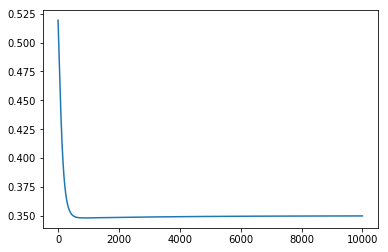

In [16]:
import matplotlib.pyplot as plt
plt.plot(niter, losses)

In [17]:
np.gradient(w)

array([ 0.33396354,  0.32284559, -0.14552576, -0.27102596,  0.29711763,
        0.53350802])

In [18]:
def sigmoid(x):
    # Activation function used to map any real value between 0 and 1
    return 1 / (1 + np.exp(-x))

def net_input(w, X):
    # Computes the weighted sum of inputs
    return np.dot(X, w[1:]) + w[0]

def probability(w, X):
    # Returns the probability after passing through sigmoid
    return sigmoid(net_input(w, X))

def cost_function(w, X, y):
    # Computes the cost function for all the training samples
    m = X.shape[0]
    total_cost = -(1 / m) * np.sum(
        y * np.log(probability(w, X)) + (1 - y) * np.log(
            1 - probability(w, X)))
    return total_cost

def gradient(w, X, y):
    # Computes the gradient of the cost function at the point theta
    m = X.shape[0]
    return (1 / m) * np.dot(X.T, sigmoid(net_input(w,   X)) - y)

In [19]:
gradient(w, X, y)

array([ 0.45006556, -0.41263723, -0.05360261,  0.29582062,  0.10287432])

In [20]:
w0 = 2
# w = np.random.random(d)
lg.gradient_logistic_surrogate_loss(X, y, w)

ValueError: not enough values to unpack (expected 2, got 1)

In [9]:
w0 = 2
# w = np.random.random(d)
lg.gradient_logistic_surrogate_loss(X, y, w)

array([-8.71449067e-05,  2.48636945e-05,  4.83234818e-05, -1.36803929e-05,
       -4.16710138e-05, -7.50935571e-05, -6.45455393e-04, -1.08207211e-04,
       -3.80907106e-05,  2.04690505e-04, -6.56245390e-04])

In [10]:
w = np.random.random(X.shape[1]+1)
Lold = lg.logistic_surrogate_loss(X, y, w)

In [11]:
Lold

0.7499999954830452

In [12]:
n, d = X.shape

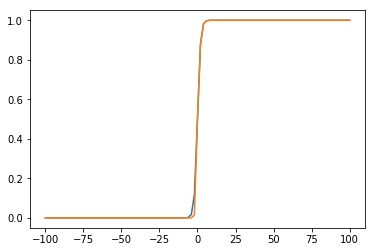

In [13]:
x_test = np.linspace(-100, 100, 101)
plt.plot(x_test, lg.logistic(x_test))
plt.plot(x_test, lg.stable_logistic(x_test))

In [14]:
np.log(1/(1+np.exp(-100)))

0.0

# Apprentissage des paramètres du modèle

La régression linéaire utilise la méthode du gradient conjugué afin de minimiser la fonction de coût.

Le gradient conjugué utilise lui-même une recherche linéaire afin de trouver le pas d'apprentissage optimal.
Un brève présentation de l'algorithme de recherche linéaire s'impose donc.

## recherche linéaire

On cherche une valeur maximale admissible du pas d'apprentissage en allant selon un direction de descente $p_t$ (vérifiant $p_t^T\nabla\mathcal{L}(w)$.
On suit toujours un règle de mise à jour avec la condition de décroissance de la fonction de coût.
$$\forall{t} \in \mathbb{N}, \hat{\mathcal{L}}(w^{(t+1)}) < \hat{\mathcal{L}}(w^{(t)}) $$

L'algorithme de recherche linéaire consiste à vérifier des conditions que l'on appelle *conditions de Wolfe*.

### Condition d'Armijo

Permet de répondre aux deux situations où l'équation ci-dessus peut être satisfaite sans pour autant atteindre le minimiseur de $\mathcal{L}$.

$$\forall{t} \in \mathbb{N}, \hat{\mathcal{L}}(w^{(t)} + \eta_tp_t) \leq \hat{\mathcal{L}}(w_t) + \alpha\eta_tp_t^{T}\nabla\hat{\mathcal{L}}(w_t)$$

la contrainte de décroissance linéaire implique que le taux de décroissance allant $\hat{\mathcal{L}}(w^t)$ à $\hat{\mathcal{L}}(w^{t+1})$ ne doit pas être plus grand que la descente pondéré par un coefficient alpha.

### Condition de courbure

Cette condition implique que la descente lors de l'itération suivante soit au moins égale à une fraction $\beta \in (\alpha, 1)$. Donc:
$$ \forall{t} \in \mathbb{N}, p^T_t\nabla\hat{\mathcal{L}}(w^{(t)} + \eta_tp_t) \geq \beta p^T_t\nabla\hat{\mathcal{L}}(w^{(t)})$$

In [15]:
q = np.arange(10)
p = q + 1

In [16]:
p[1] = 100

In [17]:
q

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [18]:
g = lg.gradient_logistic_surrogate_loss(X, y, w)

In [19]:
p = -g

In [20]:
eta = 0.2
eta2 = 1
a = np.array([[1/eta**2, 1/eta2**2], [-eta2/eta, eta/eta2]])
z = np.array([1-2-6, 3-4-1]).reshape(2, 1)

In [21]:
z.ravel()

array([-7, -2])

In [22]:
(a @ z).reshape(1, -1)[0][0]

-176.99999999999997

In [23]:
ab = 1/(eta-eta2) * np.dot(a,z)

In [24]:
ab = ab.reshape(1, -1)

In [25]:
a, b = ab[0][0], ab[0][1]

In [26]:
a.shape

()

In [27]:
p.shape

(11,)

In [28]:
w1 = np.random.random(d+1)
w2 = np.random.random(d+1)

In [29]:
w2

array([0.11212352, 0.11421168, 0.69384272, 0.14726285, 0.26871746,
       0.33566604, 0.80316115, 0.45338342, 0.51985261, 0.39715825,
       0.67430127])

In [30]:
lg.logistic_surrogate_loss(X, y, w2)

0.7498172908812524

In [34]:
loss = lg.logistic_surrogate_loss(X, y, w2)
g = lg.gradient_logistic_surrogate_loss(X, y, w2)
p = -g

In [36]:
w2, test_new_loss = opt.line_search(X, y, cost_func=lg.logistic_surrogate_loss, p=p, 
                                    g=g, old_loss=loss, w_old=w2)
# w2, test_new_loss = line_search(X, y, w2, cost_func=logistic_surrogate_loss, p=p, g=g)

> /home/iaamini/Documents/ML_practice/ML_fundamentals/ML_fundamentals/algorithms/optimizers.py(36)line_search()
-> alpha = 1e-4
(Pdb) n
> /home/iaamini/Documents/ML_practice/ML_fundamentals/ML_fundamentals/algorithms/optimizers.py(37)line_search()
-> min_eta = 1e-7
(Pdb) n
> /home/iaamini/Documents/ML_practice/ML_fundamentals/ML_fundamentals/algorithms/optimizers.py(39)line_search()
-> n, d = X.shape
(Pdb) n
> /home/iaamini/Documents/ML_practice/ML_fundamentals/ML_fundamentals/algorithms/optimizers.py(42)line_search()
-> pente = p @ g
(Pdb) n
> /home/iaamini/Documents/ML_practice/ML_fundamentals/ML_fundamentals/algorithms/optimizers.py(45)line_search()
-> _max = 0.
(Pdb) print(pente)
-0.0007134817264646589
(Pdb) n
> /home/iaamini/Documents/ML_practice/ML_fundamentals/ML_fundamentals/algorithms/optimizers.py(46)line_search()
-> for j in range(d+1):
(Pdb) n
> /home/iaamini/Documents/ML_practice/ML_fundamentals/ML_fundamentals/algorithms/optimizers.py(47)line_search()
-> if np.abs(p[j]) >

BdbQuit: 

In [58]:
w2

array([0.77084941, 0.51170377, 0.48691143, 0.59902129, 0.99471183,
       0.61206021, 0.38004313, 0.72647739, 0.3834334 , 0.98672469,
       0.66083577])

In [59]:
lg.logistic_surrogate_loss(X, y, w1)

0.7499999999645529

In [60]:
lg.logistic_surrogate_loss(X, y, w2)

0.6995819789587178

In [34]:
a = np.arange(11)
b = np.arange(11)

In [35]:
np.maximum(2,0)

2

In [36]:
print(ps.T.shape, g.shape)

NameError: name 'ps' is not defined

In [37]:
# ps @ g

In [38]:
g[-1]

-49.99999999999999

In [39]:
g.shape[0]

11

# Gradient conjugué

In [57]:
w = np.random.random(11)

In [59]:
opt.conjugate_gradient(X=X, y=y, w=w, 
                   cost_func=lg.logistic_surrogate_loss, 
                   grd_func=lg.gradient_logistic_surrogate_loss, epsilon=0.1)

> /home/iaamini/Documents/ML_practice/ML_fundamentals/ML_fundamentals/algorithms/optimizers.py(130)conjugate_gradient()
-> epoque = 0
(Pdb) n
> /home/iaamini/Documents/ML_practice/ML_fundamentals/ML_fundamentals/algorithms/optimizers.py(131)conjugate_gradient()
-> n, d = X.shape
(Pdb) n
> /home/iaamini/Documents/ML_practice/ML_fundamentals/ML_fundamentals/algorithms/optimizers.py(132)conjugate_gradient()
-> w_old = np.random.random(d+1)
(Pdb) n
> /home/iaamini/Documents/ML_practice/ML_fundamentals/ML_fundamentals/algorithms/optimizers.py(135)conjugate_gradient()
-> new_loss = cost_func(X, y, w)
(Pdb) n
> /home/iaamini/Documents/ML_practice/ML_fundamentals/ML_fundamentals/algorithms/optimizers.py(136)conjugate_gradient()
-> old_loss = new_loss + 2 * epsilon
(Pdb) n
> /home/iaamini/Documents/ML_practice/ML_fundamentals/ML_fundamentals/algorithms/optimizers.py(137)conjugate_gradient()
-> g = grd_func(X, y, w)
(Pdb) n
> /home/iaamini/Documents/ML_practice/ML_fundamentals/ML_fundamentals/al

/home/iaamini/Documents/ML_practice/ML_fundamentals/ML_fundamentals/algorithms/logistic_regression.py:35: RuntimeWarning: overflow encountered in exp
  np.exp(x) / (1. + np.exp(-x)),
/home/iaamini/Documents/ML_practice/ML_fundamentals/ML_fundamentals/algorithms/logistic_regression.py:17: RuntimeWarning: overflow encountered in exp
  return 1.0 / (1.0 + np.exp(-x))


In [58]:
lg.gradient_logistic_surrogate_loss(X, y, w)

array([ 31.43962682,   0.06276278,   5.54213954,  -5.75087006,
         1.85309174,  -9.14239035,   3.75536922, -35.84533628,
        -6.12016493, -21.55472194, -47.90183445])

In [43]:
ps**2

NameError: name 'ps' is not defined

# Test des algos sur un table

In [1]:
import pandas as pd
breast_cancer = pd.read_csv('../../DB/breast-cancer-wisconsin.data', sep=',', header=None)
breast_cancer.columns = ['col' + str(i) for i in range(len(breast_cancer.columns))]

In [2]:
breast_cancer.drop('col6', inplace=True, axis=1)

In [3]:
X = breast_cancer.iloc[:, 1:-1]
y = breast_cancer.iloc[:, -1]
y[y==2] = -1
y[y==4] = 1

In [4]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, 
                                                    test_size=.4, shuffle=True)

In [5]:
w = np.random.random(X.shape[1]+1)
w

NameError: name 'np' is not defined

In [30]:
w = opt.conjugate_gradient(X=X_train, y=y_train, w=w, 
                   cost_func=lg.logistic_surrogate_loss, 
                   grd_func=lg.gradient_logistic_surrogate_loss, 
                           epsilon=0.1)

> /home/iaamini/Documents/ML_practice/ML_fundamentals/ML_fundamentals/algorithms/optimizers.py(131)conjugate_gradient()
-> epoque = 0
(Pdb) c


/home/iaamini/Documents/ML_practice/ML_fundamentals/ML_fundamentals/algorithms/logistic_regression.py:35: RuntimeWarning: overflow encountered in exp
  np.exp(x) / (1.0 + np.exp(-x)),
/home/iaamini/Documents/ML_practice/ML_fundamentals/ML_fundamentals/algorithms/logistic_regression.py:17: RuntimeWarning: overflow encountered in exp
  return 1.0 / (1.0 + np.exp(-x))


0.34844868735083534
> /home/iaamini/Documents/ML_practice/ML_fundamentals/ML_fundamentals/algorithms/optimizers.py(36)line_search()
-> alpha = 1e-4
(Pdb) c
[-421.13048483 -185.17699511 -199.66373247 -189.81458539 -290.04887726
 -278.79262835 -171.51222662 -145.942052   -135.70490661]
[-177.77731091  -78.07850458  -84.19366181  -79.82934308 -122.32859962
 -117.71187978  -72.20796585  -61.64890042  -56.89658338]
[-77.3517843  -33.88174257 -36.54216638 -34.44129369 -53.11480251
 -51.23804366 -31.22767978 -26.86330875 -24.37443775]
[-33.35423416 -14.51864518 -15.66551151 -14.55627992 -22.79146132
 -22.11511012 -13.2737566  -11.6233507  -10.1261208 ]
[-14.27734516  -6.12300364  -6.61360689  -5.93434077  -9.64356985
  -9.48770316  -5.48911862  -5.01546032  -3.9481959 ]
[-5.99081775 -2.47614519 -2.68168403 -2.18918425 -3.9324519  -4.00267078
 -2.10766496 -2.14515664 -1.26465855]
[-2.39249087 -0.89253988 -0.97429287 -0.56289417 -1.45246624 -1.62086011
 -0.63930856 -0.89876109 -0.09936408]
[-0.

In [31]:
w

array([0.36945376, 0.32297786, 0.33623839, 0.68538686, 0.45108042,
       0.207331  , 0.48774832, 0.05792673, 0.79507351])